# Steady state creep behavior of Al-Al2O3 dispersion strengthened alloy

### Imports

In [1]:
from numpy import genfromtxt
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12,'font.family':'serif'})
import numpy as np

## Data
Read the data files. Normalize and plot them.

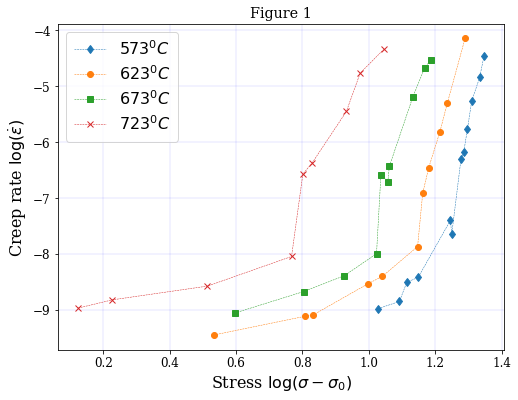

In [17]:
SS573K = np.transpose(genfromtxt('DATA_Pandey_etal/SS_573K.csv', delimiter=','))
SS573K3 = np.transpose(genfromtxt('DATA_Pandey_etal/SS_573K_3.csv', delimiter=','))
SS673K = np.transpose(genfromtxt('DATA_Pandey_etal/SS_673K.csv', delimiter=','))
SS623K = np.transpose(genfromtxt('DATA_Pandey_etal/SS_623K.csv', delimiter=','))
SS673K3 = np.transpose(genfromtxt('DATA_Pandey_etal/SS_673K_3.csv', delimiter=','))
SS723K = np.transpose(genfromtxt('DATA_Pandey_etal/SS_723K.csv', delimiter=','))

sigma0 = 12
YoungsE = 1
SS573K[0] = np.log10((SS573K[0]-sigma0)/YoungsE)
SS623K[0] = np.log10((SS623K[0]-sigma0)/YoungsE)
SS673K[0] = np.log10((SS673K[0]-sigma0)/YoungsE)
SS723K[0] = np.log10((SS723K[0]-sigma0)/YoungsE)

plt.figure(figsize=(8,6))

plt.plot((SS573K[0]),SS573K[1],'d--',linewidth='0.5')
plt.plot((SS623K[0]),SS623K[1],'o--',linewidth='0.5')
plt.plot((SS673K[0]),SS673K[1],'s--',linewidth='0.5')
plt.plot((SS723K[0]),SS723K[1],'x--',linewidth='0.5')

leg = plt.legend(["$573^0C$","$623^0C$","$673^0C$","$723^0C$"],labelspacing=0.4, borderpad=0.5,fontsize=16,loc=2)
plt.ylabel("Creep rate $\log(\dot{\epsilon})$",fontsize=16)
plt.xlabel("Stress $\log (\sigma -\sigma_0)$",fontsize=16)
plt.title("Figure 1")
plt.grid(color='blue', linewidth='0.1')
plt.show()

### Two stress regimes
A function to identify and plot High Stress (HS) and Low Stress (LS) regimes. It fits the data into polynomials to compute the slope i.e. the stress exponent.

In [10]:
def plotHsLsregimes(SSdata,transS,savename,res):
    DATA = np.copy(SSdata)

    pol = np.poly1d(np.polyfit(DATA[0], DATA[1], 7))

    plt.figure(figsize=(6,6))
    plt.scatter(DATA[0], DATA[1],color='white',edgecolor='orange',marker='s',s=60)

    halfone = DATA[0]<=transS + res
    halftwo = DATA[0]>=transS - res

    Xdata = DATA[0][halfone]
    Ydata = DATA[1][halfone]
    pol1 = np.poly1d(np.polyfit(Xdata , Ydata, 1))
    plt.plot(Xdata, pol1(Xdata),"--",linewidth=1,color='darkblue')

    ssYax = '%.4e' % pol1[1]
    textX = np.average(Xdata)
    textY = np.average(Ydata)
    plt.text(textX,textY,ssYax,bbox=dict(boxstyle="square", ec=(1., 1, 0.5),fc=(1., 1, 1),),fontsize=16)

    Xdata = DATA[0][halftwo]
    Ydata = DATA[1][halftwo]
    pol2 = np.poly1d(np.polyfit(Xdata , Ydata, 1))
    plt.plot(Xdata, pol2(Xdata),"--",linewidth=1,color='darkblue')

    ssYax = '%.4e' % pol2[1]
    textX = np.average(Xdata)
    textY = np.average(Ydata)
    plt.text(textX,textY,ssYax,bbox=dict(boxstyle="square", ec=(1., 1, 0.5),fc=(1., 1, 1),),fontsize=16)

    plt.xlabel("Stress $\log(\sigma - \sigma_0)$",fontsize=16)
    plt.ylabel("Creep Rate $log(\dot{\epsilon})$",fontsize=16)
    plt.title("Figure 2")
    plt.show()
    print(pol1)
    print(pol2)
    
    return [pol1, pol2]

### Differentiation into two stress regimes

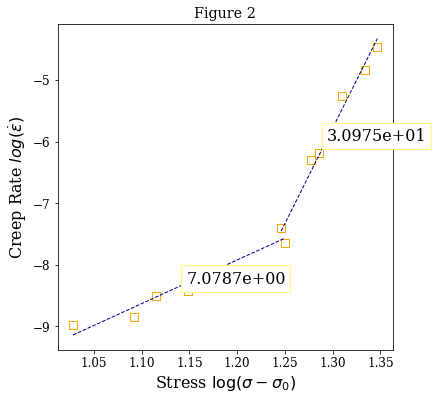

 
7.079 x - 16.42
 
30.97 x - 46.05


In [11]:
[Ls573K,Hs573K] = plotHsLsregimes(SS573K,1.25,"SS573K",0.01)

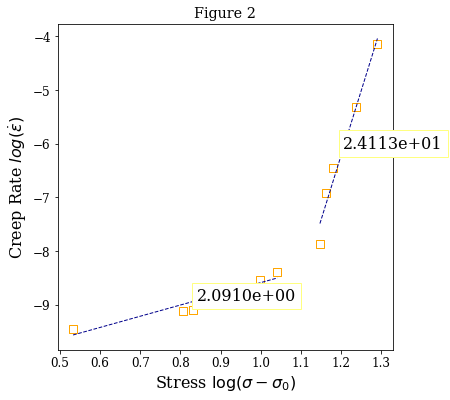

 
2.091 x - 10.68
 
24.11 x - 35.14


In [12]:
[Ls623K,Hs623K] = plotHsLsregimes(SS623K,1.1,"SS623K",0.01)

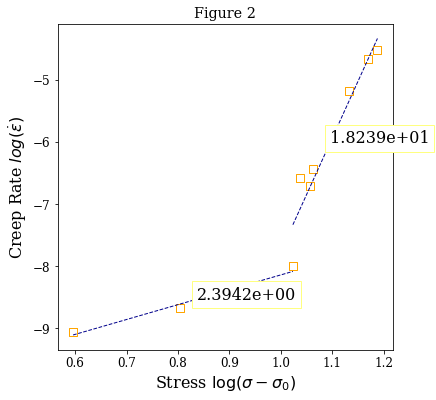

 
2.394 x - 10.53
 
18.24 x - 25.99


In [13]:
[Ls673K,Hs673K] = plotHsLsregimes(SS673K,1,"SS673K",0.026)

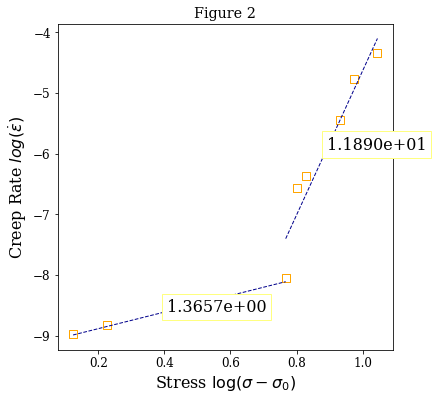

 
1.366 x - 9.16
 
11.89 x - 16.52


In [14]:
[Ls723K,Hs723K] = plotHsLsregimes(SS723K,0.7,"SS723K",0.07)

## Activation energy calculation

 
-18.67 x + 17.33
 
-80.87 x + 94.81


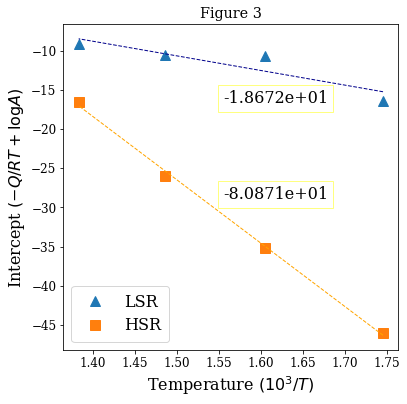

In [15]:
onebyT = [1000/573, 1000/623, 1000/673, 1000/723]
LSRint = [Ls573K[0],Ls623K[0],Ls673K[0],Ls723K[0]]
HSRint = [Hs573K[0],Hs623K[0],Hs673K[0],Hs723K[0]]

plt.figure(figsize=(6,6))

plt.plot(onebyT,LSRint,'^',markersize=10)
plt.plot(onebyT,HSRint,'s',markersize=10)

pol1 = np.poly1d(np.polyfit(onebyT, LSRint, 1))
plt.plot(onebyT, pol1(onebyT),"--",linewidth=1,color='darkblue')
print(pol1)

ssYax = '%.4e' % pol1[1]
textX = np.average(onebyT)
textY = np.average(LSRint)
plt.text(textX,textY-5,ssYax,bbox=dict(boxstyle="square", ec=(1., 1, 0.5),fc=(1., 1, 1),),fontsize=16)

pol2 = np.poly1d(np.polyfit(onebyT, HSRint, 1))
plt.plot(onebyT, pol2(onebyT),"--",linewidth=1,color='orange')
print(pol2)

ssYax = '%.4e' % pol2[1]
textX = np.average(onebyT)
textY = np.average(HSRint)
plt.text(textX,textY+2,ssYax,bbox=dict(boxstyle="square", ec=(1., 1, 0.5),fc=(1., 1, 1),),fontsize=16)

leg = plt.legend(["LSR","HSR"],labelspacing=0.4, borderpad=0.5,fontsize=16,loc=3)

plt.ylabel("Intercept $(-Q/RT + \log{A})$",fontsize=16)
plt.xlabel("Temperature $(10^3/T)$",fontsize=16)

plt.title("Figure 3")
plt.show()

## Normalized plot 1

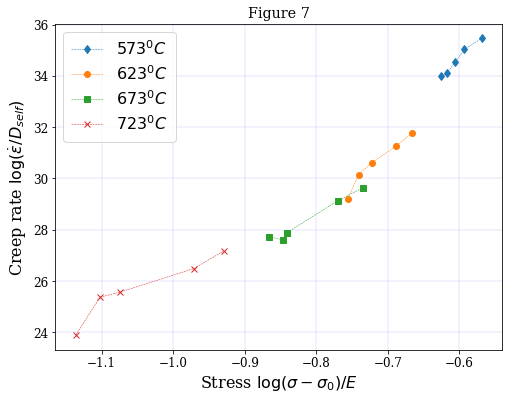

In [12]:
SS573K = np.transpose(genfromtxt('SS_573K.csv', delimiter=','))
SS673K = np.transpose(genfromtxt('SS_673K.csv', delimiter=','))
SS623K = np.transpose(genfromtxt('SS_623K.csv', delimiter=','))
SS723K = np.transpose(genfromtxt('SS_723K.csv', delimiter=','))
sigma0 = 12
YoungsE = 80
R = 8.314
Q = 192000
SS573K[0] = np.log10((SS573K[0]-sigma0)/YoungsE)
SS623K[0] = np.log10((SS623K[0]-sigma0)/YoungsE)
SS673K[0] = np.log10((SS673K[0]-sigma0)/YoungsE)
SS723K[0] = np.log10((SS723K[0]-sigma0)/YoungsE)

SS573K[1] = SS573K[1] +Q/(R*573)
SS623K[1] = SS623K[1] +Q/(R*623)
SS673K[1] = SS673K[1] +Q/(R*673)
SS723K[1] = SS723K[1] +Q/(R*723)

plt.figure(figsize=(8,6))
lastem = -6
fstem = -1
plt.plot((SS573K[0][lastem:fstem]),SS573K[1][lastem:fstem],'d--',linewidth='0.5')
plt.plot((SS623K[0][lastem:fstem]),SS623K[1][lastem:fstem],'o--',linewidth='0.5')
plt.plot((SS673K[0][lastem:fstem]),SS673K[1][lastem:fstem],'s--',linewidth='0.5')
plt.plot((SS723K[0][lastem:fstem]),SS723K[1][lastem:fstem],'x--',linewidth='0.5')
leg = plt.legend(["$573^0C$","$623^0C$","$673^0C$","$723^0C$"],labelspacing=0.4, borderpad=0.5,fontsize=16,loc=2)
plt.ylabel("Creep rate $\log(\dot{\epsilon}/D_{self})$",fontsize=16)
plt.xlabel("Stress $\log (\sigma -\sigma_0)/E$",fontsize=16)
plt.title("Figure 7")
plt.grid(color='blue', linewidth='0.1')
plt.show()

## Normalized plot 2

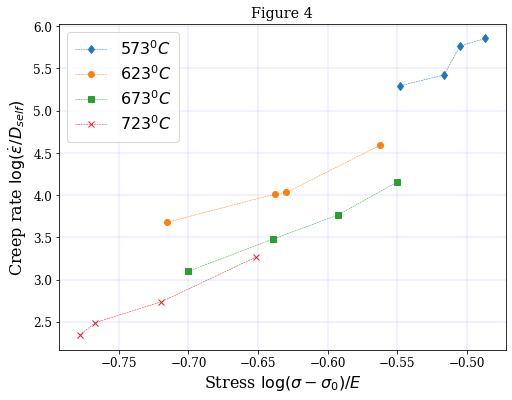

In [16]:
SS573K = np.transpose(genfromtxt('SS_573K.csv', delimiter=','))
SS673K = np.transpose(genfromtxt('SS_673K.csv', delimiter=','))
SS623K = np.transpose(genfromtxt('SS_623K.csv', delimiter=','))
SS723K = np.transpose(genfromtxt('SS_723K.csv', delimiter=','))

sigma0 = 0
YoungsE = 80
R = 8.314
Q = 68000

SS573K[0] = np.log10((SS573K[0]-sigma0)/YoungsE)
SS623K[0] = np.log10((SS623K[0]-sigma0)/YoungsE)
SS673K[0] = np.log10((SS673K[0]-sigma0)/YoungsE)
SS723K[0] = np.log10((SS723K[0]-sigma0)/YoungsE)

SS573K[1] = SS573K[1] +Q/(R*573)
SS623K[1] = SS623K[1] +Q/(R*623)
SS673K[1] = SS673K[1] +Q/(R*673)
SS723K[1] = SS723K[1] +Q/(R*723)

plt.figure(figsize=(8,6))
lastem = 0
fstem = 4
plt.plot((SS573K[0][lastem:fstem]),SS573K[1][lastem:fstem],'d--',linewidth='0.5')
plt.plot((SS623K[0][lastem:fstem]),SS623K[1][lastem:fstem],'o--',linewidth='0.5')
plt.plot((SS673K[0][lastem:fstem]),SS673K[1][lastem:fstem],'s--',linewidth='0.5')
plt.plot((SS723K[0][lastem:fstem]),SS723K[1][lastem:fstem],'x--',linewidth='0.5')

leg = plt.legend(["$573^0C$","$623^0C$","$673^0C$","$723^0C$"],labelspacing=0.4, borderpad=0.5,fontsize=16,loc=2)
plt.ylabel("Creep rate $\log(\dot{\epsilon}/D_{self})$",fontsize=16)
plt.xlabel("Stress $\log (\sigma -\sigma_0)/E$",fontsize=16)
plt.title("Figure 4")
plt.grid(color='blue', linewidth='0.1')
savefigname = "./Plots/Fig5.png"
plt.savefig(savefigname)